In [55]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [28]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
print("No. of passengers:", df.shape[0])

No. of passengers: 418


<AxesSubplot:xlabel='Survived', ylabel='count'>

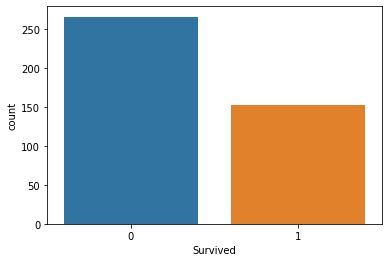

In [30]:
sns.countplot(x=df['Survived'])

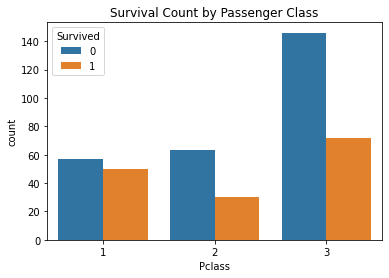

In [31]:
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival Count by Passenger Class")
plt.show()

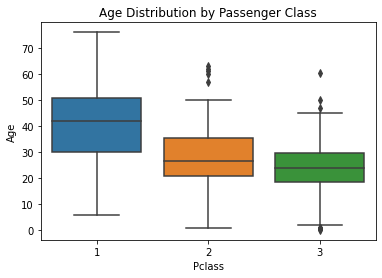

In [32]:
sns.boxplot(data=df, x="Pclass", y="Age")
plt.title("Age Distribution by Passenger Class")
plt.show()

In [33]:
null_counts = df.isnull().sum()
print("Null value counts for each column:")
print(null_counts)

Null value counts for each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [34]:
df.drop("Cabin", axis=1, inplace=True)
df.dropna(inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C


In [35]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})
df["Pclass"] = df["Pclass"].map({1: 0, 2: 1, 3: 2})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,2,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1
1,893,1,2,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2
2,894,0,1,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1
3,895,0,2,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2
4,896,1,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,2,"Peacock, Miss. Treasteall",1,3.0,1,1,SOTON/O.Q. 3101315,13.7750,2
411,1303,1,0,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,19928,90.0000,1
412,1304,1,2,"Henriksson, Miss. Jenny Lovisa",1,28.0,0,0,347086,7.7750,2
414,1306,1,0,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,0


In [36]:
encoded_df = df[['Sex', 'Embarked', 'Pclass']]
df = pd.concat([df, encoded_df], axis=1)
df.drop(['Sex', 'Embarked', 'Pclass'], axis=1, inplace=True)

In [51]:
X = df.drop(["Survived", "Name", "Ticket"], axis=1)
y = df["Survived"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,PassengerId,Age,SibSp,Parch,Fare
281,1173,0.75,1,1,13.7750
96,988,76.00,1,0,78.8500
341,1233,32.00,0,0,7.5792
18,910,27.00,1,0,7.9250
26,918,22.00,0,1,61.9792
...,...,...,...,...,...
237,1129,20.00,0,0,7.2250
86,978,27.00,0,0,7.8792
134,1026,43.00,0,0,7.8958
345,1237,16.00,0,0,7.6500


In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [54]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

NameError: name 'classification_report' is not defined